# Exploratory Data Analysis (EDA)

EDA is the process of examining and visualizing a dataset to understand its characteristics and uncover relationships between variables. It is a crucial step in the data analysis process. Working with data without performing EDA is like driving a car with your eyes closed. You might get to your destination, but you're more likely to crash along the way.

In this notebook, we will take a look at two datasets: orange quality dataset and pokemon stats dataset. We will perform EDA to understand their structure and uncover relationships between variables. Pandas and Seaborn are probably the most commonly used libraries for EDA in Python, and we will use them in this notebook. Let's import them both.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Not necessary, but can be useful for customizing seaborn plots

import warnings # This library is used to ignore warnings, don't worry about it for now
warnings.filterwarnings('ignore')

# Introduction to Pandas

pandas.DataFrame is a 2-dimensional data structure with columns of potentially different types. You can think of it like an excel spreadsheet. It is generally the most commonly used pandas object.

<br/><br/>
<center>
<img src="figures/characters.png" height="250">
</center>
<br/><br/>


Let's imagine we want to create a DataFrame that contains the information about characters from the **critically-acclaimed 2019 game Disco Elysium**. This would be an example to learn how to create a DataFrame from scratch and perform some basic operations on it.

In [2]:
# First, initialize an empty DataFrame

df = pd.DataFrame()

# Now, let's create the columns as lists

first_names = ['Harry', 'Kim', 'Lawrence', 'Joyce', 'Jules', 'Goracy']
last_names =  ['Du Bois', 'Kitsuragi', 'Garte', 'Messier', 'Pidieu', 'Kubek']
ages = [44, 43, 28, 48, 68, 39]
occupations = ['Cop', 'Cop', 'Bartender', 'Landlady', 'Cop', 'Cook']
nationalities = ['Revacholian', 'Revacholian', 'Revacholian', 'Vespertine/Revacholian', 'Unknown', 'Semenese']

# Let's add the columns to the DataFrame

df['first_name'] = first_names
df['last_name'] = last_names
df['age'] = ages
df['occupation'] = occupations
df['citizenship'] = nationalities

# Let's take a peek at the first 6 rows of the DataFrame
df.head(6)

,first_name,last_name,age,occupation,citizenship
0,Harry,Du Bois,44,Cop,Revacholian
1,Kim,Kitsuragi,43,Cop,Revacholian
2,Lawrence,Garte,28,Bartender,Revacholian
3,Joyce,Messier,48,Landlady,Vespertine/Revacholian
4,Jules,Pidieu,68,Cop,Unknown
5,Goracy,Kubek,39,Cook,Semenese


In [3]:
# We can also create a DataFrame from a dictionary

data = {'first_name': first_names, 
        'last_name': last_names, 
        'age': ages, 
        'occupation': occupations,
        'citizenship': nationalities}

df = pd.DataFrame(data)
df.head(6) 

# It's the same as before

,first_name,last_name,age,occupation,citizenship
0,Harry,Du Bois,44,Cop,Revacholian
1,Kim,Kitsuragi,43,Cop,Revacholian
2,Lawrence,Garte,28,Bartender,Revacholian
3,Joyce,Messier,48,Landlady,Vespertine/Revacholian
4,Jules,Pidieu,68,Cop,Unknown
5,Goracy,Kubek,39,Cook,Semenese


In [4]:
# Suppose we only want to see the last names and occupations of the characters. 
# We can do this by selecting the columns we want.

name_and_occupation = df[['last_name', 'occupation']]
name_and_occupation.head()

,last_name,occupation
0,Du Bois,Cop
1,Kitsuragi,Cop
2,Garte,Bartender
3,Messier,Landlady
4,Pidieu,Cop


In [5]:
# We can also select rows based on a condition. For example, we can select only the characters who are cops.

cops_only = df[df['occupation'] == 'Cop']
cops_only.head()

,first_name,last_name,age,occupation,citizenship
0,Harry,Du Bois,44,Cop,Revacholian
1,Kim,Kitsuragi,43,Cop,Revacholian
4,Jules,Pidieu,68,Cop,Unknown


In [6]:
# If we wanted to see some statistics about the dataframe values, we would use the describe() method

df['age'].describe()

count     6.000000
mean     45.000000
std      13.175735
min      28.000000
25%      40.000000
50%      43.500000
75%      47.000000
max      68.000000
Name: age, dtype: float64

In [7]:
# We can also sort the DataFrame by values in a column. Let's sort the characters by age.

df_sorted = df.sort_values(by='age')
df_sorted.head()

,first_name,last_name,age,occupation,citizenship
2,Lawrence,Garte,28,Bartender,Revacholian
5,Goracy,Kubek,39,Cook,Semenese
1,Kim,Kitsuragi,43,Cop,Revacholian
0,Harry,Du Bois,44,Cop,Revacholian
3,Joyce,Messier,48,Landlady,Vespertine/Revacholian


In [8]:
# As time passes, the characters get older. This does not really happen in the game, as the story spans only a few days. Nevertheless, let's see what the characters' ages will be in 10 years and add this information to the DataFrame.

df['age_in_10_yrs'] = df['age'] + 10
df.head()

,first_name,last_name,age,occupation,citizenship,age_in_10_yrs
0,Harry,Du Bois,44,Cop,Revacholian,54
1,Kim,Kitsuragi,43,Cop,Revacholian,53
2,Lawrence,Garte,28,Bartender,Revacholian,38
3,Joyce,Messier,48,Landlady,Vespertine/Revacholian,58
4,Jules,Pidieu,68,Cop,Unknown,78


In [9]:
# If we wanted to perform a more complex operation on the 'age' column, we could use the apply() method.

# You can write a custom function that takes a value from a column, does something with it, and returns the result. Then, you can apply this function to the column.

def do_something_with_age(x):
    if x < 30:
        return 'Young'
    elif x < 60:
        return 'Middle-aged'
    else:
        return 'Elderly'

df['age_categorical'] = df['age'].apply(do_something_with_age)
df.head()

,first_name,last_name,age,occupation,citizenship,age_in_10_yrs,age_categorical
0,Harry,Du Bois,44,Cop,Revacholian,54,Middle-aged
1,Kim,Kitsuragi,43,Cop,Revacholian,53,Middle-aged
2,Lawrence,Garte,28,Bartender,Revacholian,38,Young
3,Joyce,Messier,48,Landlady,Vespertine/Revacholian,58,Middle-aged
4,Jules,Pidieu,68,Cop,Unknown,78,Elderly


## Iterating over rows in a DataFrame (don't do it!)

When working with pandas DataFrames it is advised **not to use 'for' loops to iterate over rows**. In contrast to Python lists, pandas DataFrames are optimized for vectorized operations. This means that you can apply operations to entire columns at once, which is much faster than iterating over rows. If you find yourself iterating over rows in a DataFrame, you are probably doing something wrong. There is almost always a better, more efficient way to do it using pandas methods.

Nevertheless, be aware of the iterrows() method. Here is an example of how it could be used:

In [10]:
print('My favorite characters of Disco Elysium:')
for index, row in df.iterrows():
    first_name = row['first_name']
    last_name = row['last_name']
    job = row['occupation']
    print(f'{index}: {first_name} {last_name}, who is a {job}')

My favorite characters of Disco Elysium:
0: Harry Du Bois, who is a Cop
1: Kim Kitsuragi, who is a Cop
2: Lawrence Garte, who is a Bartender
3: Joyce Messier, who is a Landlady
4: Jules Pidieu, who is a Cop
5: Goracy Kubek, who is a Cook


# Introduction to Seaborn

In [11]:
df = pd.read_csv('data/orange_quality.csv')
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [12]:
# Suppose we are only interested in oranges that are of variety 'Temple', 'Satsuma Mandarin' or 'Moro (Blood)'.
# We can filter the DataFrame to only include these varieties.

df_filtered = df[df['Variety'].isin(['Temple', 'Satsuma Mandarin', 'Moro (Blood)'])]

Text(0, 0.5, '')

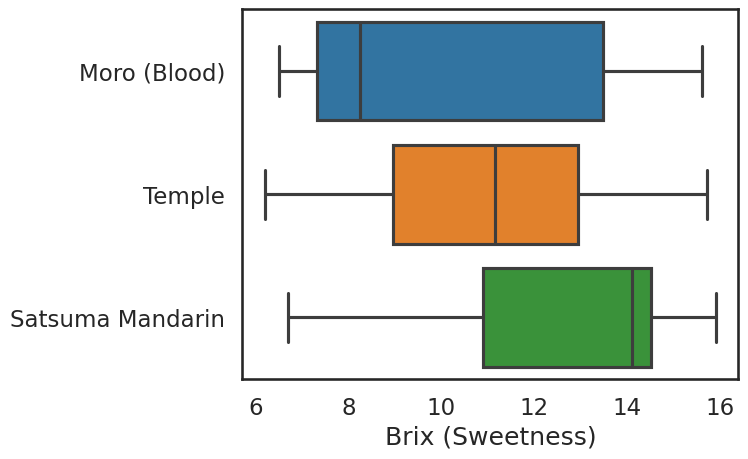

In [13]:
# Let's plot the 'Brix (Sweetness)' values using a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile, median, third quartile, and maximum.

sns.set_style('white')
sns.set_context('talk') # Try 'paper', 'poster', 'notebook' and see how it changes the looks

boxplot = sns.boxplot(data=df_filtered, x='Brix (Sweetness)', y='Variety')
plt.ylabel('') # Remove the y-axis label

<Axes: xlabel='Size (cm)', ylabel='Density'>

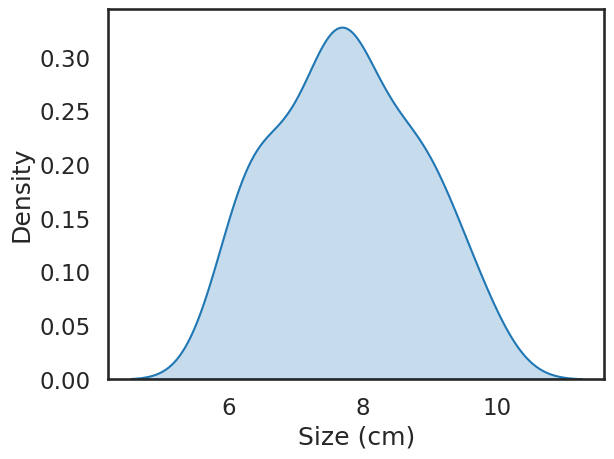

In [14]:
# Let's plot a distribution of the 'Size (cm)' values. We can use a kernel density estimate (KDE) plot for this. A KDE plot is a non-parametric way to estimate the probability density function of a random variable.

sns.set_style('white')
sns.set_context('talk')

sns.kdeplot(df_filtered, x='Size (cm)', fill=True)

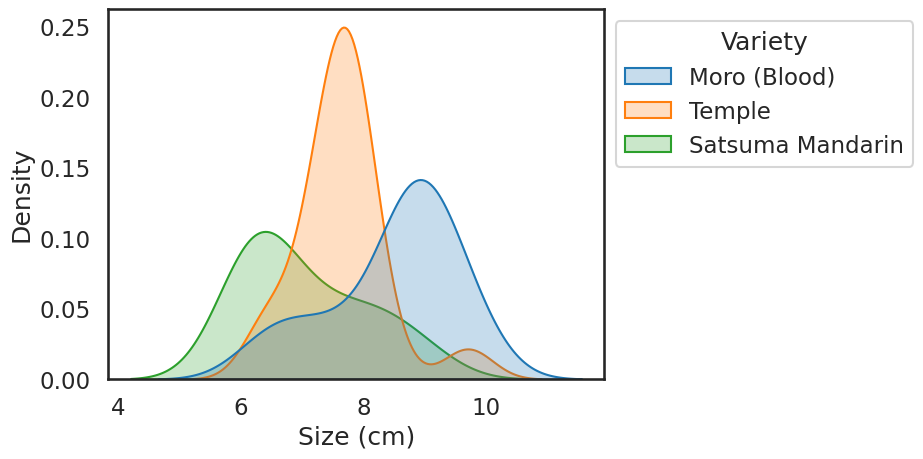

In [15]:
# That's a bit hard to interpret and doesn't give us much information abut the data. Let's plot a histogram for each of the three orange varieties to see if there are any differences in the size distribution between the species.

# It can be done by passing hue='Variety' parameter. Seaborn will create a separate histogram for each category in the 'Variety' column.

ax = sns.kdeplot(df_filtered, x='Size (cm)', hue='Variety', fill=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) # Move the legend outside the plot

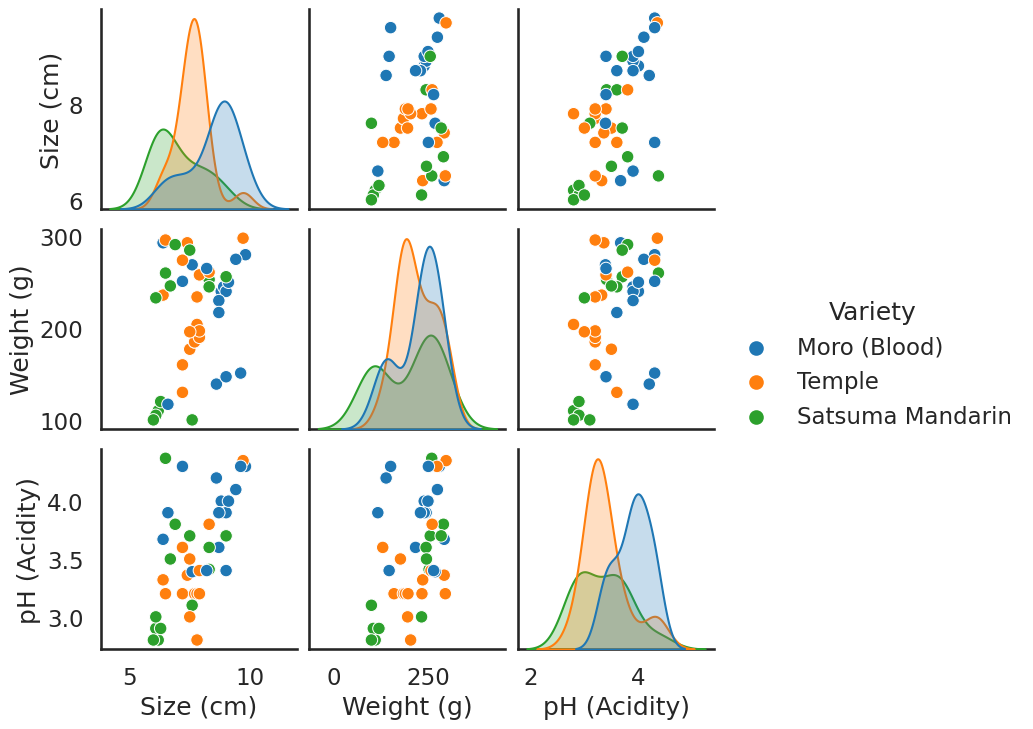

In [16]:
# A pairplot is a great way to explore and visualize relationships between variables in a dataset. It creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. Let's create a pairplot for the orange dataset, focusing on 'Size (cm)', 'Weight (g)' and 'pH (Acidity)' columns. We will also color the points based on the 'Variety' column.

# We select the columns we are interested in seeing
df_selected = df_filtered[['Size (cm)', 'Weight (g)', 'pH (Acidity)', 'Variety']]

sns.pairplot(df_selected, hue="Variety")

# Exercise 1 (Pokemon stats)

Work with [pandas documentation](https://pandas.pydata.org/docs/reference/frame.html) to complete the following tasks.


In this exercise we will work with a dataset containing the stats of different pokemons. The dataset is stored in a CSV file `data/pokemon_data.csv`.

<br/><br/>
<center>
<img src="figures/pokemon_types.png" height="250">
</center>
<br/><br/>

1. Load the dataset into a DataFrame and take a look at the first few rows.  
2. How many different types of pokemons are there in the dataset? (look for them in column 'type1')
3. Prepare a pandas DataFrame describing the number of pokemons for each pokemon type (column 'type1'). The first column should contain the types and the second column should contain the number of pokemons of that type. Hint: There is a pandas.DataFrame method that does exactly this in one line of code.
4. Plot a bar chart showing the number of pokemons for ten most common pokemon types. The x-axis should contain the pokemon types and the y-axis should contain the number of pokemons.
5. Prepare a boxplot showing the distribution of 'attack' values for ten most common pokemon types.
6. Prepare a pairplot showing the relationship between 'attack', 'hp' and 'catch_rate' columns for 'Rock', 'Dragon' and 'Bug' pokemon types. Color the points based on the type. Apply a custom color palette to the plot, assigning an appropriate color to each type (see the image above).
